In [4]:
# Bibliothèques standard
import joblib
import pandas as pd
import numpy as np
import shap

# Bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-learn pour la prétraitement
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import label_binarize

# Modules Scikit-learn pour les métriques
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    recall_score, 
    precision_score, 
    confusion_matrix, 
    classification_report, 
    ConfusionMatrixDisplay, 
    make_scorer, 
    matthews_corrcoef,
    roc_curve, 
    roc_auc_score,
    auc
)

# Modules Scikit-learn pour les modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Modules Joblib
from joblib import dump, load

# XGBoost
from xgboost import XGBClassifier

# Modules Imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Paramètres d'affichage pour Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

1. [**Préparation des données pour la modélisation**](#1.-Préparation-des-données-pour-la-modélisation)
    1.  [Séparation de la variable cible et des variables explicative](#A.-Séparation-de-la-variable-cible-et-des-variables-explicatives)
    2.  [Binarisation de la variable cible](#B.-Binarisation-de-la-variable-cible)
    3.  [Division des données en ensemble d'entrainement et de test](#B.-Division-des-données-en-ensemble-d'entrainement-et-de-test)
2. [**Entraînement du modèle avec les 5 solveurs et les hyperparamètres par défaut et analyse des performances**](#2.-Entraînement-du-modèle-avec-les-5-solveurs-et-les-hyperparamètres-par-défaut-et-analyse-des-performances)
3. [**GridSearchCV sans échantillonage pour trouver les meilleurs Hyper-Paramètres**](#3.-GridSearchCV-sans-échantillonage-pour-trouver-les-meilleurs-Hyper-Paramètres)
4. [**GridSearchCV Undersampling pour trouver les meilleurs Hyper-Paramètres**](#4.-GridSearchCV-Undersampling-pour-trouver-les-meilleurs-Hyper-Paramètres)
5. [**RandomSearchCV Oversampling pour trouver les meilleurs Hyper-Paramètres**](#5.-RandomSearchCV-Oversampling-pour-trouver-les-meilleurs-Hyper-Paramètres)
6. [**RandomSearchCV SMOTE**](#6.-RandomSearchCV-SMOTE)
7. [**Algorithme de boosting : Adaboost**](#7.-Algorithme-de-boosting-:-Adaboost)
8. [**Algorithme de bagging - undersampling**](#8.-Algorithme-de-bagging-:-undersampling)
9. [**Algorithme de bagging - oversampling**](#9.-Algorithme-de-bagging-:-oversampling)
10.  [**Shap**](#9.-Shap)


In [5]:
df = pd.read_csv('data/dataset_18-21_for_model_encoding.csv', sep=',', index_col=0)

In [6]:
df.head()

,grav,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,3.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
201800000001,1.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
201800000002,1.0,-1.083406,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201800000003,3.0,-1.083406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800000004,1.0,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423136 entries, 201800000001 to 202100056518
Columns: 182 entries, grav to age_usag_75-plus
dtypes: float64(2), int64(180)
memory usage: 590.8 MB


In [8]:
print(df.shape)
df.head()

(423136, 182)


,grav,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,3.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
201800000001,1.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
201800000002,1.0,-1.083406,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201800000003,3.0,-1.083406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800000004,1.0,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 1. Préparation des données pour la modélisation

### A. Séparation de la variable cible et des variables explicatives

In [9]:
X = df.drop(['grav'], axis=1)
y = df['grav']

### B. Binarisation de la variable cible

In [10]:
# Création variable cible binaire
y = y.replace([1, 4], 0).replace([2, 3], 1)

In [11]:
y.value_counts()

grav
0.0    345502
1.0     77634
Name: count, dtype: int64

### C. Division des données en ensemble d'entrainement et de test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Dans notre exemple, l'argument test_size est réglé sur 0.1. Cela signifie que nous réservons 10% de notre ensemble de données pour les tests,
# laissant ainsi 90% pour l'entraînement du modèle.
# L'argument random_state est utilisé pour garantir la reproductibilité de notre répartition des données.
# En le définissant à 101, nous nous assurons que la séparation des données en ensembles d'entraînement et de test sera identique à chaque exécution du code,
# malgré le caractère aléatoire intrinsèque de la fonction train_test_split de Scikit-learn.
# Cette démarche assure une cohérence et une fiabilité accrue dans l'évaluation de nos modèles d'apprentissage automatique.

In [10]:
X_train.head()

,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201900026392,0.117620,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800002002,2.519672,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800046223,1.318646,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201900025538,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201900008933,-1.083406,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [11]:
y_test.value_counts()

grav
0.0    34551
1.0     7763
Name: count, dtype: int64

## 2. Entraînement du modèle avec les 5 solveurs et les hyperparamètres par défaut et analyse des performances

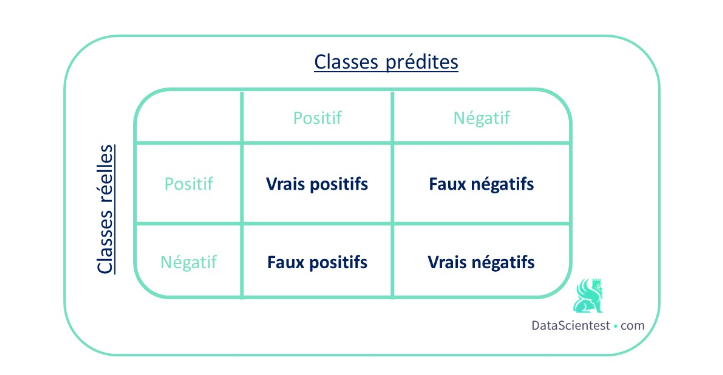


## Entrainement sur les 5 solveurs et évaluation des performances

#### Evaluation des 5 modèles avec les hyperparamètres par défauts

Utilisation du solveur newton-cg
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446912225125905

Moyenne F1_class_1: 0.4533458730921976

Moyenne recall_class_1: 0.35100396740778866

Moyenne precision_class_1: 0.6399911371392334

Moyenne precision_macro: 0.7537967836551892

Moyenne precision_micro: 0.8446912225125905

Moyenne precision_weighted: 0.8258416305223119

Moyenne recall_macro: 0.6533136012761899

Moyenne recall_micro: 0.8446912225125905

Moyenne recall_weighted: 0.8446912225125905

Moyenne f1_macro: 0.681416786769327

Moyenne f1_micro: 0.8446912225125905

Moyenne f1_weighted: 0.8257974595057336

Moyenne roc_auc: 0.849715415241494

Moyenne matthews_corrcoef:

<Figure size 200x200 with 0 Axes>

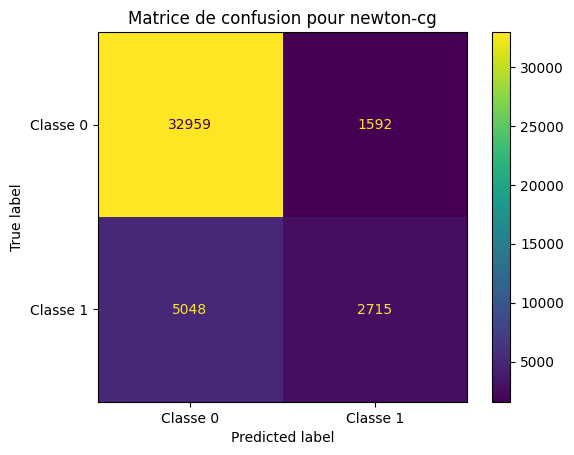

              precision    recall  f1-score   support

           0    0.86718   0.95392   0.90849     34551
           1    0.63037   0.34974   0.44988      7763

    accuracy                        0.84308     42314
   macro avg    0.74878   0.65183   0.67918     42314
weighted avg    0.82374   0.84308   0.82435     42314


****************************************************************************************************

Utilisation du solveur lbfgs
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446964742548554

Moyenne F1_class_1: 0.45338433970450237

Moyenne recall_class_1: 0.35104690244707415

Moyenne precision_class_1: 0.6400015226564534

Moyenne precision_macr

<Figure size 200x200 with 0 Axes>

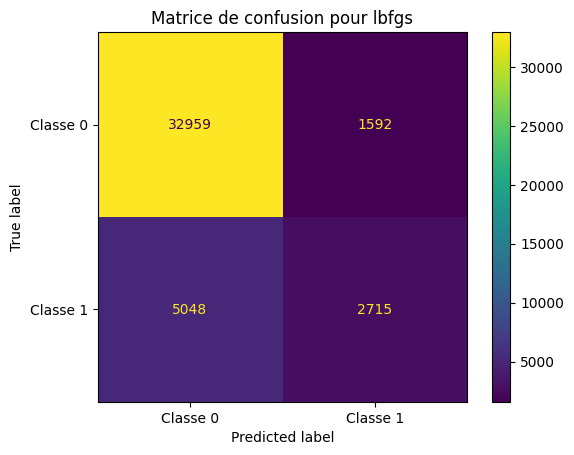

              precision    recall  f1-score   support

           0    0.86718   0.95392   0.90849     34551
           1    0.63037   0.34974   0.44988      7763

    accuracy                        0.84308     42314
   macro avg    0.74878   0.65183   0.67918     42314
weighted avg    0.82374   0.84308   0.82435     42314


****************************************************************************************************

Utilisation du solveur liblinear
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446912225332767

Moyenne F1_class_1: 0.4533360090159754

Moyenne recall_class_1: 0.35098965511352787

Moyenne precision_class_1: 0.6399974350543283

Moyenne precisi

<Figure size 200x200 with 0 Axes>

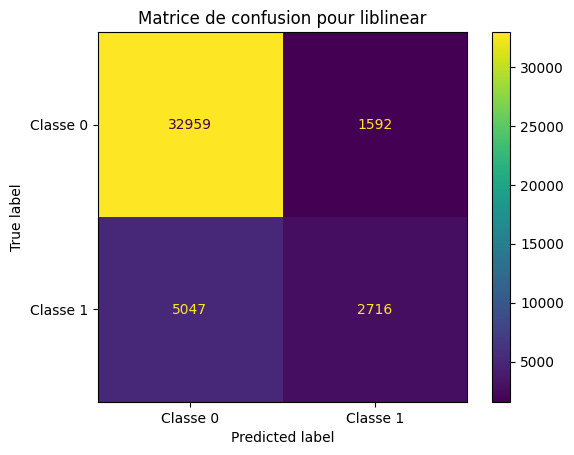

              precision    recall  f1-score   support

           0    0.86721   0.95392   0.90850     34551
           1    0.63045   0.34986   0.45000      7763

    accuracy                        0.84310     42314
   macro avg    0.74883   0.65189   0.67925     42314
weighted avg    0.82377   0.84310   0.82438     42314


****************************************************************************************************

Utilisation du solveur sag
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446938484250951

Moyenne F1_class_1: 0.453360164341704

Moyenne recall_class_1: 0.35101827970204935

Moyenne precision_class_1: 0.6400012590888844

Moyenne precision_macro: 0.7

<Figure size 200x200 with 0 Axes>

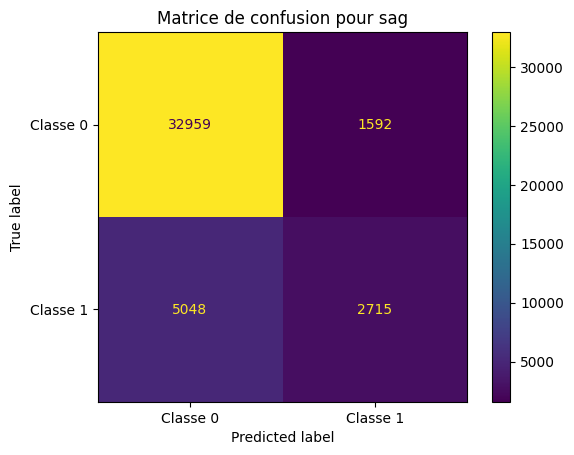

              precision    recall  f1-score   support

           0    0.86718   0.95392   0.90849     34551
           1    0.63037   0.34974   0.44988      7763

    accuracy                        0.84308     42314
   macro avg    0.74878   0.65183   0.67918     42314
weighted avg    0.82374   0.84308   0.82435     42314


****************************************************************************************************

Utilisation du solveur saga
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446964743375998

Moyenne F1_class_1: 0.45336449665695383

Moyenne recall_class_1: 0.3510182803165483

Moyenne precision_class_1: 0.6400176952299778

Moyenne precision_macro: 

<Figure size 200x200 with 0 Axes>

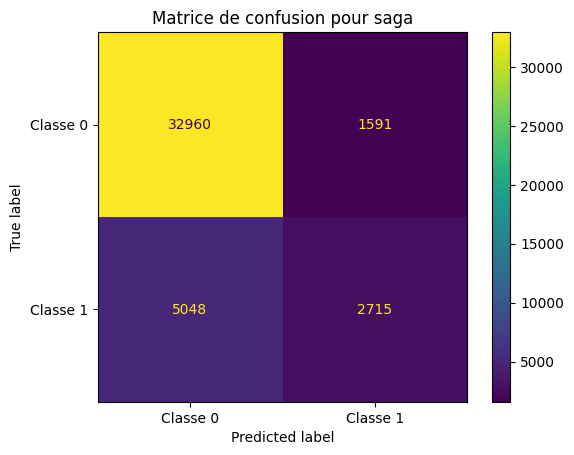

              precision    recall  f1-score   support

           0    0.86719   0.95395   0.90850     34551
           1    0.63052   0.34974   0.44991      7763

    accuracy                        0.84310     42314
   macro avg    0.74885   0.65184   0.67921     42314
weighted avg    0.82377   0.84310   0.82437     42314


****************************************************************************************************

Modèles triés par F1-score sur la classe 1 :
liblinear: F1-Score = 0.4500041421588932, Accuracy = 0.843101573947157, ROC AUC = 0.8491236463931864
saga: F1-Score = 0.4499130002485707, Accuracy = 0.843101573947157, ROC AUC = 0.8491198994608193
newton-cg: F1-Score = 0.4498757249378625, Accuracy = 0.8430779411069622, ROC AUC = 0.8491198025252558
lbfgs: F1-Score = 0.4498757249378625, Accuracy = 0.8430779411069622, ROC AUC = 0.8491201753543469
sag: F1-Score = 0.4498757249378625, Accuracy = 0.8430779411069622, ROC AUC = 0.849119921830565


In [2]:
# Chargement des données
df = pd.read_csv('data/dataset_18-21_for_model_encoding.csv', sep=',', index_col=0)
X = df.drop(['grav'], axis=1)
y = df['grav']
y = y.replace([1, 4], 0).replace([2, 3], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Liste de solveurs à tester
solveurs = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Hyperparamètres
C_value = 1.0
max_iter_value = 1000

# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Test de chaque solveur
model_results = []
for solveur in solveurs:
    print(f"Utilisation du solveur {solveur}")
    print("-" * 50 + "\n")

    clf = LogisticRegression(solver=solveur, C=C_value, max_iter=max_iter_value)
    print("Hyperparamètres :", clf.get_params())

    cv_results = cross_validate(clf, X_train, y_train, cv=3, scoring=scoring)

    # Affichage des moyennes pour toutes les métriques
    for metric in scoring.keys():
        mean_score = np.mean(cv_results['test_' + metric])
        print(f"Moyenne {metric}: {mean_score}\n")

    # Entraînement du modèle
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_test_prob = clf.predict_proba(X_test)[:, 1]
    
    # Enregistrement du modèle
    joblib.dump(clf, f"modeles_fabien/binary_{solveur}_model.joblib")

    # Matrice de confusion
    plt.figure(figsize=(2, 2))
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
    disp.plot()
    plt.title(f"Matrice de confusion pour {solveur}")
    plt.show()
    
    # Rapport de classification
    print(classification_report(y_test, y_test_pred, labels=[0,1], digits=5))
    
    # Calcul des métriques sur le jeu de test
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score_class_1(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    
    # Enregistrement des résultats dans la liste
    model_results.append((solveur, test_f1, test_accuracy, test_roc_auc))
    print("\n" + "*" * 100 + "\n")

# Tri des modèles par F1-score
model_results.sort(key=lambda x: x[1], reverse=True)

# Affichage des modèles triés
print("Modèles triés par F1-score sur la classe 1 :")
for solveur, f1, test_accuracy, test_roc_auc in model_results:
    print(f"{solveur}: F1-Score = {f1}, Accuracy = {test_accuracy}, ROC AUC = {test_roc_auc}")

# Temps d'éxécution = 27m 41.2s
    

#### le meilleur modèle

Le meilleur solveur est : liblinear


<Figure size 200x200 with 0 Axes>

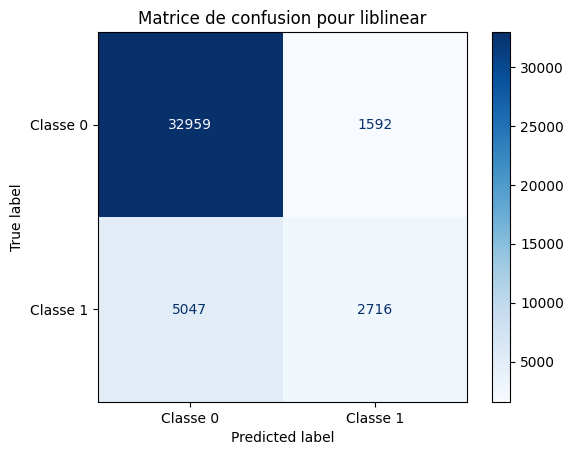

              precision    recall  f1-score   support

           0    0.86721   0.95392   0.90850     34551
           1    0.63045   0.34986   0.45000      7763

    accuracy                        0.84310     42314
   macro avg    0.74883   0.65189   0.67925     42314
weighted avg    0.82377   0.84310   0.82438     42314



['modeles_fabien/binary_liblinear_best_model.joblib']

In [3]:
# Affichage du nom du meilleur solveur
best_solver = model_results[0][0]
print(f"Le meilleur solveur est : {best_solver}")

# Réentraînement du modèle en utilisant le meilleur solveur
best_model = LogisticRegression(solver=best_solver, C=C_value, max_iter=max_iter_value)
best_model.fit(X_train, y_train)

# Prédiction avec le meilleur modèle
y_test_pred = best_model.predict(X_test)

# Calcul de la probabilité de la classe positive pour le ROC AUC
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Matrice de confusion
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matrice de confusion pour {best_solver}")
plt.show()
    
# Calcul et affichage des métriques sur le jeu de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score_class_1(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
print(classification_report(y_test, y_test_pred, labels=[0, 1], digits=5))
    
# Sauvegarde du modèle entraîné avec le meilleur solveur
filename = f"modeles_fabien/binary_{best_solver}_best_model.joblib"
joblib.dump(best_model, filename)

# temps d'éxécution = 11.1s

#### Courbe ROC

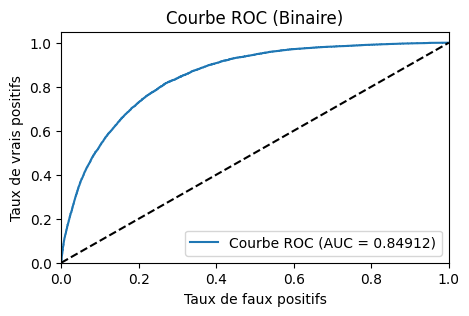

In [5]:
# Chargement du modèle

best_model = joblib.load(f"modeles_fabien/binary_liblinear_best_model.joblib")
y_test_pred = best_model.predict(X_test)

# Tracer la courbe ROC
y_score = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

## 3. GridSearchCV sans échantillonage pour trouver les meilleurs Hyper-Paramètres

#### Résultats bruts

In [30]:
# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}


param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"]
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0]
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"]
    }
]

log_model = LogisticRegression(random_state=42)
grid_model = GridSearchCV(log_model, param_grid, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
grid_model.fit(X_train, y_train)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(grid_model.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/binary_grid_search_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())
# 202m 6.0ss

Fitting 3 folds for each of 264 candidates, totalling 792 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      10.079097      0.074803         1.483837        0.050839   0.001   
1      19.817664      0.344936         1.717429        0.171344   0.001   
2       8.474076      1.970649         1.405938        0.132529   0.001   
3      16.570613      0.549153         1.674224        0.076995   0.001   
4       5.740770      0.336214         1.231093        0.025549   0.001   

  param_max_iter param_multi_class param_penalty param_solver param_l1_ratio  \
0           1000               ovr            l1    liblinear            NaN   
1           1000               ovr            l1         saga            NaN   
2          10000               ovr            l1    liblinear            NaN   
3          10000               ovr            l1         saga            NaN   
4         100000               ovr            l1    liblinear            NaN   

     

#### Résultat net

In [31]:
# Chargement du fichier CSV
resultats = pd.read_csv('resultats_fabien/binary_grid_search_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/binary_grid_search_results_net.csv'
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,C,max_iter,multi_class,penalty,solver,l1_ratio,accuracy,F1_class_1,recall_class_1,precision_class_1,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,0.001,1000,ovr,l1,liblinear,NaN,0.829894,0.267559,0.169341,0.637054,0.738418,0.829894,0.802586,0.573831,0.829894,0.829894,0.585666,0.829894,0.787044,0.814046,0.265350,0.522045
1,0.001,1000,ovr,l1,saga,NaN,0.832738,0.275114,0.173004,0.671488,0.756114,0.832738,0.809686,0.576993,0.832738,0.832738,0.590288,0.832738,0.789809,0.816632,0.280840,0.527253
2,0.001,10000,ovr,l1,liblinear,NaN,0.829894,0.267559,0.169341,0.637054,0.738418,0.829894,0.802586,0.573831,0.829894,0.829894,0.585666,0.829894,0.787044,0.814046,0.265350,0.522045
3,0.001,10000,ovr,l1,saga,NaN,0.832738,0.275114,0.173004,0.671488,0.756114,0.832738,0.809686,0.576993,0.832738,0.832738,0.590288,0.832738,0.789809,0.816632,0.280840,0.527253
4,0.001,100000,ovr,l1,liblinear,NaN,0.829894,0.267559,0.169341,0.637054,0.738418,0.829894,0.802586,0.573831,0.829894,0.829894,0.585666,0.829894,0.787044,0.814046,0.265350,0.522045
5,0.001,100000,ovr,l1,saga,NaN,0.832738,0.275114,0.173004,0.671488,0.756114,0.832738,0.809686,0.576993,0.832738,0.832738,0.590288,0.832738,0.789809,0.816632,0.280840,0.527253
6,0.010,1000,ovr,l1,liblinear,NaN,0.843499,0.428201,0.319389,0.649511,0.756126,0.843499,0.823619,0.640328,0.843499,0.843499,0.668772,0.843499,0.821066,0.844964,0.379162,0.620658
7,0.010,1000,ovr,l1,saga,NaN,0.843667,0.428957,0.320033,0.650321,0.756591,0.843667,0.823865,0.640680,0.843667,0.843667,0.669197,0.843667,0.821281,0.845085,0.379983,0.621149
8,0.010,10000,ovr,l1,liblinear,NaN,0.843499,0.428201,0.319389,0.649511,0.756126,0.843499,0.823619,0.640328,0.843499,0.843499,0.668772,0.843499,0.821066,0.844964,0.379162,0.620658
9,0.010,10000,ovr,l1,saga,NaN,0.843667,0.428957,0.320033,0.650321,0.756591,0.843667,0.823865,0.640680,0.843667,0.843667,0.669197,0.843667,0.821281,0.845085,0.379983,0.621149


#### Résultats Max

In [32]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_1 = df_resultat['F1_class_1'].idxmax()
index_max_recall_class_1 = df_resultat['recall_class_1'].idxmax()
index_max_precision_class_1 = df_resultat['precision_class_1'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_1, index_max_recall_class_1, index_max_precision_class_1,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/binary_grid_search_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


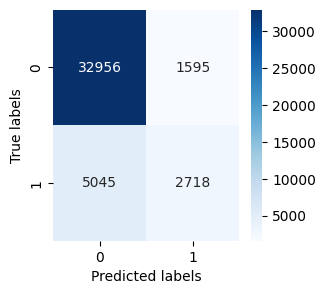

              precision    recall  f1-score   support

     Class 0    0.86724   0.95384   0.90848     34551
     Class 1    0.63019   0.35012   0.45015      7763

    accuracy                        0.84308     42314
   macro avg    0.74871   0.65198   0.67931     42314
weighted avg    0.82375   0.84308   0.82439     42314



In [6]:
# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/binary_grid_search_results_max.csv')

# Récupération de l'index du meilleur score pour "mean_test_F1_class_2"
best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "solver": best_row['solver'],
}

# Ajout conditionnel des hyperparamètres s'ils ne sont pas None
for param in ['l1_ratio', 'C', 'penalty']:
    if param in best_row and not pd.isna(best_row[param]):
        best_params[param] = best_row[param]

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train, y_train)
y_pred = log_model_best.predict(X_test)

# Enregistrement du modèle
joblib.dump(log_model_best, f"modeles_fabien/binary_best_grid_model.joblib")

# Calcul de la matrice de confusion en spécifiant les labels
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Rapport de classification
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Class 0", "Class 1"], digits=5)

print(report)


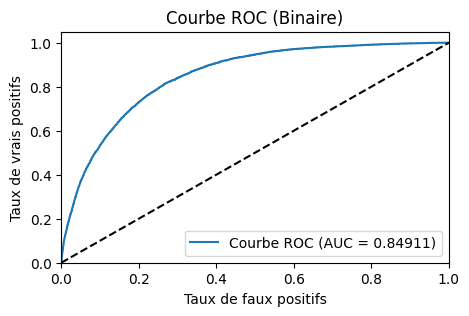

In [7]:
# Prédictions de probabilités pour la classe positive
y_score = log_model_best.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

## 4. GridSearchCV Undersampling pour trouver les meilleurs Hyper-Paramètres

In [9]:
rus = RandomUnderSampler()
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

#### Résultats bruts

In [26]:
# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"] 
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0] 
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"]
    }
]

log_model = LogisticRegression(random_state=42)
grid_model = GridSearchCV(log_model, param_grid, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
grid_model.fit(X_train_us, y_train_us)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(grid_model.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/binary_grid_search_under_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())

# 112m 29.3s

Fitting 3 folds for each of 264 candidates, totalling 792 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C   
0       1.438319      0.051150         0.517106        0.006138   0.001  \
1       6.265020      0.023815         0.553258        0.014060   0.001   
2       1.300437      0.190677         0.483560        0.030709   0.001   
3       6.351525      0.124945         0.574670        0.005116   0.001   
4       1.044448      0.026643         0.515085        0.014024   0.001   

  param_max_iter param_multi_class param_penalty param_solver param_l1_ratio   
0           1000               ovr            l1    liblinear            NaN  \
1           1000               ovr            l1         saga            NaN   
2          10000               ovr            l1    liblinear            NaN   
3          10000               ovr            l1         saga            NaN   
4         100000               ovr            l1    liblinear            NaN   

     

#### Résultat net

In [30]:
# Chargement du fichier CSV
resultats = pd.read_csv('resultats_fabien/binary_grid_search_under_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/binary_grid_search_under_results_net.csv' # Vous pouvez changer ce chemin selon vos besoins
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,C,max_iter,multi_class,penalty,solver,l1_ratio,accuracy,F1_class_1,recall_class_1,precision_class_1,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,0.001,1000,ovr,l1,liblinear,NaN,0.727584,0.728561,0.731190,0.725960,0.727602,0.727584,0.727602,0.727584,0.727584,0.727584,0.727578,0.727584,0.727578,0.800475,0.455185,0.727775
1,0.001,1000,ovr,l1,saga,NaN,0.727577,0.729293,0.733924,0.724732,0.727621,0.727577,0.727621,0.727577,0.727577,0.727577,0.727563,0.727577,0.727563,0.800514,0.455198,0.727909
2,0.001,10000,ovr,l1,liblinear,NaN,0.727584,0.728561,0.731190,0.725960,0.727602,0.727584,0.727602,0.727584,0.727584,0.727584,0.727578,0.727584,0.727578,0.800475,0.455185,0.727775
3,0.001,10000,ovr,l1,saga,NaN,0.727577,0.729293,0.733924,0.724732,0.727621,0.727577,0.727621,0.727577,0.727577,0.727577,0.727563,0.727577,0.727563,0.800514,0.455198,0.727909
4,0.001,100000,ovr,l1,liblinear,NaN,0.727584,0.728561,0.731190,0.725960,0.727602,0.727584,0.727602,0.727584,0.727584,0.727584,0.727578,0.727584,0.727578,0.800475,0.455185,0.727775
5,0.001,100000,ovr,l1,saga,NaN,0.727577,0.729293,0.733924,0.724732,0.727621,0.727577,0.727621,0.727577,0.727577,0.727577,0.727563,0.727577,0.727563,0.800514,0.455198,0.727909
6,0.010,1000,ovr,l1,liblinear,NaN,0.763879,0.769434,0.787966,0.751755,0.764495,0.763879,0.764495,0.763879,0.763879,0.763879,0.763742,0.763879,0.763742,0.842831,0.528373,0.764880
7,0.010,1000,ovr,l1,saga,NaN,0.763972,0.769339,0.787236,0.752242,0.764547,0.763972,0.764547,0.763972,0.763972,0.763972,0.763844,0.763972,0.763844,0.843146,0.528519,0.764943
8,0.010,10000,ovr,l1,liblinear,NaN,0.763879,0.769434,0.787966,0.751755,0.764495,0.763879,0.764495,0.763879,0.763879,0.763879,0.763742,0.763879,0.763742,0.842831,0.528373,0.764880
9,0.010,10000,ovr,l1,saga,NaN,0.763972,0.769339,0.787236,0.752242,0.764547,0.763972,0.764547,0.763972,0.763972,0.763972,0.763844,0.763972,0.763844,0.843146,0.528519,0.764943


#### Résultats max

In [32]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_1 = df_resultat['F1_class_1'].idxmax()
index_max_recall_class_1 = df_resultat['recall_class_1'].idxmax()
index_max_precision_class_1 = df_resultat['precision_class_1'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_1, index_max_recall_class_1, index_max_precision_class_1,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/binary_grid_search_under_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'C': 1.0, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.5}


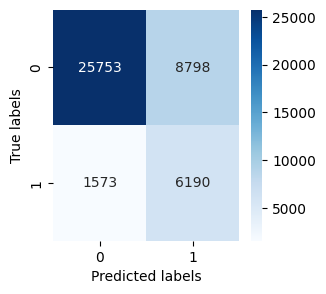

In [13]:
# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/binary_grid_search_under_results_max.csv')
best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "C": best_row['C'],
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "penalty": best_row['penalty'],
    "solver": best_row['solver'],
    "l1_ratio": best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
}

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train_us, y_train_us)

# Enregistrement du modèle
joblib.dump(log_model_best, f"modeles_fabien/binary_best_grid_under_model.joblib")

# Prédiction des classes pour l'ensemble de test
y_pred = log_model_best.predict(X_test)

# Calcul de la matrice de confusion en spécifiant les labels
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [14]:
# Rapport de classification
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Class 0", "Class 1"], digits=5)
print(report)

              precision    recall  f1-score   support

     Class 0    0.94244   0.74536   0.83239     34551
     Class 1    0.41300   0.79737   0.54415      7763

    accuracy                        0.75490     42314
   macro avg    0.67772   0.77137   0.68827     42314
weighted avg    0.84530   0.75490   0.77951     42314



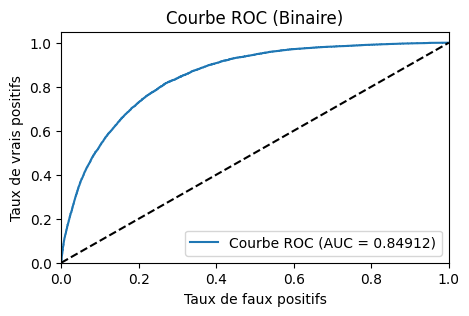

In [15]:
# Prédictions de probabilités pour la classe positive
y_score = best_model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Obtention des coefficients
coefficients = log_model_best.coef_

# Création d'un DataFrame pour afficher les coefficients
coeff_df = pd.DataFrame(coefficients, columns = X_train.columns)
import matplotlib.pyplot as plt
import numpy as np

# Obtention des coefficients
coefficients = log_model_best.coef_[0]

# Création d'un DataFrame pour afficher les coefficients absolus
abs_coeff_df = pd.DataFrame(np.abs(coefficients), index = X_train.columns, columns=['Abs_Coefficient'])

# Tri des valeurs par importance
sorted_coeff_df = abs_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

sorted_coeff_df.head(10)

,Abs_Coefficient
catu_3,2.205255
obsm_1.0,1.177828
age_usag_75-plus,1.018328
obs_17.0,0.865724
age_cond_95-plus,0.846107
obs_2.0,0.801608
catv_5.0,0.800152
age_usag_65-74,0.798703
manv_22.0,0.719684
obs_6.0,0.715938


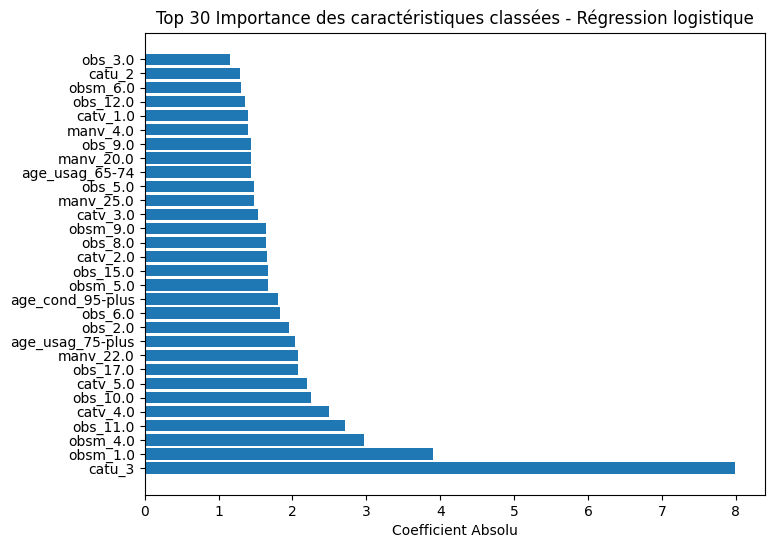

In [22]:
# Sélection des 30 premières valeurs
top_30_df = sorted_coeff_df.head(30)

# graphique à barres horizontales des coefficients
plt.figure(figsize=(8, 6))
plt.barh(top_30_df.index, top_30_df['Abs_Coefficient'])
plt.xlabel('Coefficient Absolu')
plt.title('Top 30 Importance des caractéristiques classées - Régression logistique')
plt.show()

## 5. RandomSearchCV Oversampling pour trouver les meilleurs Hyper-Paramètres

In [16]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

#### Résultats bruts

In [13]:
# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"]
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0]
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"]
    }
]

log_model = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(log_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
random_search.fit(X_train_os, y_train_os)

# Conversion les résultats en DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/binary_random_search_over_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())

# 94m 38.7s


Fitting 3 folds for each of 100 candidates, totalling 300 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0     239.131442     20.794359         3.046323        0.206602    newton-cg   
1     144.967134     39.530258         3.171486        0.518791    newton-cg   
2      40.967618      1.723739         3.002270        0.109404         saga   
3      64.345922      3.825952         3.129887        0.256208          sag   
4      45.023514      5.871384         3.392259        0.417223        lbfgs   

  param_penalty param_multi_class param_max_iter param_C param_l1_ratio  \
0            l2               ovr         100000       1            NaN   
1            l2       multinomial          10000   0.001            NaN   
2    elasticnet       multinomial          10000   0.001            0.5   
3            l2               ovr          10000     0.1            NaN   
4            l2               ovr          10000    0.01            NaN   

     

#### Résultat net

In [15]:
# Chargement du fichier CSV
resultats = pd.read_csv('resultats_fabien/binary_random_search_over_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/binary_random_search_over_results_net.csv' # Vous pouvez changer ce chemin selon vos besoins
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,solver,penalty,multi_class,max_iter,C,l1_ratio,accuracy,F1_class_1,recall_class_1,precision_class_1,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,newton-cg,l2,ovr,100000,1.000,NaN,0.771750,0.777429,0.797267,0.758556,0.772460,0.771750,0.772460,0.771750,0.771750,0.771750,0.771601,0.771750,0.771601,0.850619,0.544210,0.772767
1,newton-cg,l2,multinomial,10000,0.001,NaN,0.767753,0.773030,0.791002,0.755856,0.768334,0.767753,0.768334,0.767753,0.767753,0.767753,0.767627,0.767753,0.767627,0.846944,0.536086,0.768708
2,saga,elasticnet,multinomial,10000,0.001,0.5,0.761110,0.765913,0.781628,0.750819,0.761551,0.761110,0.761551,0.761110,0.761110,0.761110,0.761009,0.761110,0.761009,0.840301,0.522661,0.761990
3,sag,l2,ovr,10000,0.100,NaN,0.771678,0.777402,0.797393,0.758389,0.772399,0.771678,0.772399,0.771678,0.771678,0.771678,0.771527,0.771678,0.771527,0.850550,0.544076,0.772702
4,lbfgs,l2,ovr,10000,0.010,NaN,0.770695,0.776336,0.795916,0.757697,0.771386,0.770695,0.771386,0.770695,0.770695,0.770695,0.770549,0.770695,0.770549,0.849720,0.542081,0.771707
5,liblinear,l1,ovr,1000,1.000,NaN,0.771802,0.777497,0.797399,0.758565,0.772517,0.771802,0.772517,0.771802,0.771802,0.771802,0.771652,0.771802,0.771652,0.850619,0.544318,0.772821
6,saga,elasticnet,ovr,1000,0.100,1.0,0.771673,0.777412,0.797457,0.758351,0.772398,0.771673,0.772398,0.771673,0.771673,0.771673,0.771521,0.771673,0.771521,0.850531,0.544070,0.772699
7,sag,l2,ovr,1000,0.100,NaN,0.771678,0.777402,0.797393,0.758389,0.772399,0.771678,0.772399,0.771678,0.771678,0.771678,0.771527,0.771678,0.771527,0.850550,0.544076,0.772702
8,lbfgs,l2,multinomial,100000,0.010,NaN,0.771327,0.777050,0.796994,0.758080,0.772044,0.771327,0.772044,0.771327,0.771327,0.771327,0.771177,0.771327,0.771177,0.850165,0.543371,0.772351
9,saga,elasticnet,ovr,100000,10.000,0.0,0.771786,0.777468,0.797322,0.758580,0.772497,0.771786,0.772497,0.771786,0.771786,0.771786,0.771637,0.771786,0.771637,0.850622,0.544282,0.772803


#### Résultats Max

In [18]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_1 = df_resultat['F1_class_1'].idxmax()
index_max_recall_class_1 = df_resultat['recall_class_1'].idxmax()
index_max_precision_class_1 = df_resultat['precision_class_1'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_1, index_max_recall_class_1, index_max_precision_class_1,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/binary_random_search_over_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'C': 1.0, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear', 'l1_ratio': None}


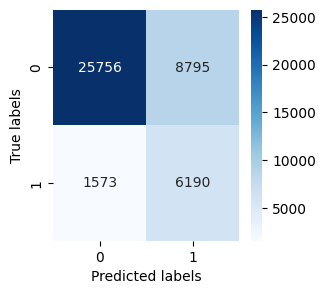

In [25]:
# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/binary_random_search_over_results_max.csv')

best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "C": best_row['C'],
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "penalty": best_row['penalty'],
    "solver": best_row['solver'],
    "l1_ratio": best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
}

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train_os, y_train_os)

# Enregistrement du modèle
joblib.dump(log_model_best, f"modeles_fabien/binary_best_random_over_model.joblib")

# Prédiction des classes pour l'ensemble de test
y_pred = log_model_best.predict(X_test)

# Calcul de la matrice de confusion en spécifiant les labels
labels = [0, 1]  # Remplacez par vos véritables labels si ce ne sont pas 0 et 1
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# 2m 34.3s


In [26]:
# Rapport de classification
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Class 0", "Class 1"], digits=5)
print(report)

              precision    recall  f1-score   support

     Class 0    0.94244   0.74545   0.83245     34551
     Class 1    0.41308   0.79737   0.54422      7763

    accuracy                        0.75497     42314
   macro avg    0.67776   0.77141   0.68834     42314
weighted avg    0.84532   0.75497   0.77957     42314



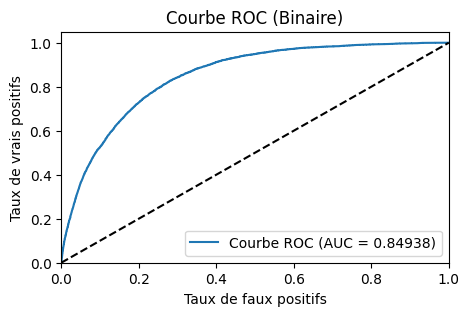

In [27]:
# Prédictions de probabilités pour la classe positive
y_score = log_model_best.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Obtention des coefficients
coefficients = log_model_best.coef_

# Création d'un DataFrame pour afficher les coefficients
coeff_df = pd.DataFrame(coefficients, columns = X_train.columns)
import matplotlib.pyplot as plt
import numpy as np

# Obtention des coefficients
coefficients = log_model_best.coef_[0]

# Création d'un DataFrame pour afficher les coefficients absolus
abs_coeff_df = pd.DataFrame(np.abs(coefficients), index = X_train.columns, columns=['Abs_Coefficient'])

# Tri des valeurs par importance
sorted_coeff_df = abs_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

sorted_coeff_df.head(10)

,Abs_Coefficient
catu_3,4.187235
obsm_1.0,2.392493
age_usag_75-plus,2.085117
age_cond_95-plus,1.734397
obs_17.0,1.698879
catv_5.0,1.661385
obs_2.0,1.643211
age_usag_65-74,1.559124
manv_22.0,1.422088
obs_6.0,1.387922


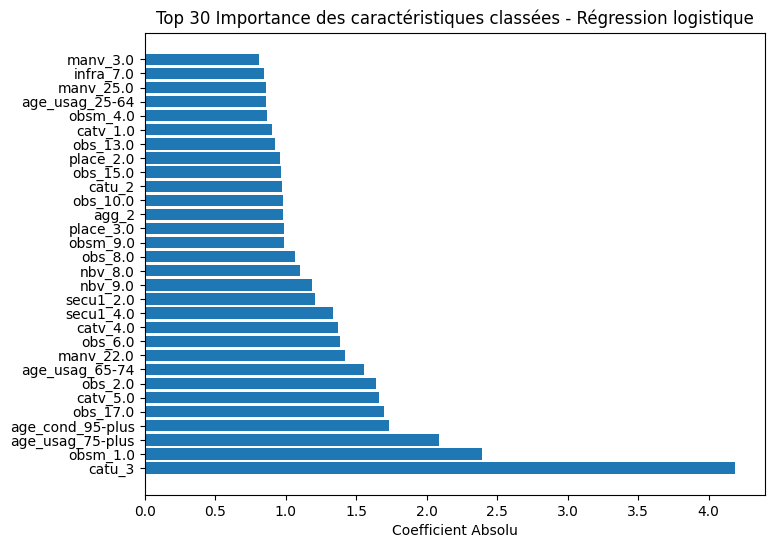

In [29]:
# Sélection des 30 premières valeurs
top_30_df = sorted_coeff_df.head(30)

# graphique à barres horizontales des coefficients
plt.figure(figsize=(8, 6))
plt.barh(top_30_df.index, top_30_df['Abs_Coefficient'])
plt.xlabel('Coefficient Absolu')
plt.title('Top 30 Importance des caractéristiques classées - Régression logistique')
plt.show()

## 6. RandomSearchCV SMOTE

#### Résultat brut

In [19]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Dictionnaire des paramètres pour RandomizedSearchCV
param_distributions = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"]
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0]
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"]
    }
]

log_model = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(log_model, param_distributions=param_distributions, n_iter=50, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False) # refit sur votre métrique personnalisée
random_search.fit(X_train_smote, y_train_smote)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/binary_random_search_smote_results_brut.csv')

# Afficher les premières lignes du DataFrame
print(results_df.head())

# Temps d'exécution : 272m 59.9s

Fitting 3 folds for each of 50 candidates, totalling 150 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0     174.798537     30.100297         5.308830        1.093688         saga   
1    1352.433814     61.281464         5.491080        1.046549         saga   
2     763.138904     87.108164         4.721620        0.119701         saga   
3     466.881041     77.479512         4.774800        0.417726         saga   
4      58.800794      3.897417         4.350482        0.623583    newton-cg   

  param_penalty param_multi_class param_max_iter param_C param_l1_ratio  \
0            l2       multinomial         100000     0.1            NaN   
1            l1               ovr          10000       1            NaN   
2    elasticnet               ovr          10000       1            0.5   
3    elasticnet               ovr           1000       1            0.0   
4            l2               ovr           1000    0.01            NaN   

      

#### Résultat net

In [21]:
# Chargement du fichier CSV
resultats = pd.read_csv('resultats_fabien/binary_random_search_smote_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes "param_" du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/binary_random_search_smote_results_net.csv'
df_resultat.to_csv(path, index=False)

# Affichage des premières lignes du DataFrame
df_resultat.head(10)

,solver,penalty,multi_class,max_iter,C,l1_ratio,accuracy,F1_class_1,recall_class_1,precision_class_1,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,saga,l2,multinomial,100000,0.10,NaN,0.844376,0.807540,0.786467,0.894875,0.874279,0.844376,0.874278,0.844375,0.844376,0.844376,0.835781,0.844376,0.835781,0.929413,0.716233,0.830133
1,saga,l1,ovr,10000,1.00,NaN,0.844125,0.806617,0.784847,0.895884,0.874369,0.844125,0.874368,0.844125,0.844125,0.844125,0.835346,0.844125,0.835347,0.929010,0.715984,0.829601
2,saga,elasticnet,ovr,10000,1.00,0.5,0.844144,0.806715,0.785078,0.895691,0.874344,0.844144,0.874343,0.844144,0.844144,0.844144,0.835387,0.844144,0.835387,0.929070,0.715990,0.829652
3,saga,elasticnet,ovr,1000,1.00,0.0,0.844175,0.806787,0.785194,0.895678,0.874373,0.844175,0.874373,0.844174,0.844175,0.844175,0.835427,0.844175,0.835427,0.929106,0.716053,0.829699
4,newton-cg,l2,ovr,1000,0.01,NaN,0.844241,0.813929,0.797122,0.884253,0.869973,0.844241,0.869973,0.844240,0.844241,0.844241,0.837428,0.844241,0.837428,0.928953,0.712592,0.832728
5,newton-cg,l2,ovr,100000,0.10,NaN,0.844551,0.808358,0.787773,0.893971,0.874084,0.844551,0.874084,0.844551,0.844551,0.844551,0.836135,0.844551,0.836135,0.929582,0.716298,0.830579
6,liblinear,l1,ovr,10000,0.01,NaN,0.843093,0.811167,0.792816,0.886447,0.869987,0.843093,0.869986,0.843092,0.843093,0.843093,0.835826,0.843093,0.835826,0.929755,0.711253,0.830894
7,lbfgs,l2,multinomial,1000,0.01,NaN,0.844871,0.812086,0.793755,0.888753,0.872253,0.844871,0.872252,0.844871,0.844871,0.844871,0.837398,0.844871,0.837398,0.929550,0.715217,0.832335
8,saga,elasticnet,multinomial,1000,0.01,0.0,0.844873,0.812089,0.793758,0.888754,0.872254,0.844873,0.872253,0.844872,0.844873,0.844873,0.837400,0.844873,0.837400,0.929552,0.715220,0.832337
9,saga,elasticnet,multinomial,100000,1.00,1.0,0.844112,0.806595,0.784824,0.895874,0.874357,0.844112,0.874357,0.844112,0.844112,0.844112,0.835331,0.844112,0.835331,0.929009,0.715959,0.829584


#### Résultats Max

In [22]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_1 = df_resultat['F1_class_1'].idxmax()
index_max_recall_class_1 = df_resultat['recall_class_1'].idxmax()
index_max_precision_class_1 = df_resultat['precision_class_1'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_1, index_max_recall_class_1, index_max_precision_class_1,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/binary_random_search_smote_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'C': 0.001, 'max_iter': 10000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga', 'l1_ratio': None}


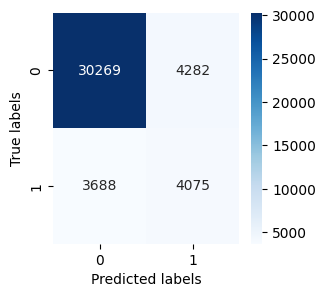

In [23]:

# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/binary_random_search_smote_results_max.csv')

best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "C": best_row['C'],
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "penalty": best_row['penalty'],
    "solver": best_row['solver'],
    "l1_ratio": best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
}

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train_smote, y_train_smote)

# Enregistrement du modèle
joblib.dump(log_model_best, f"modeles_fabien/binary_best_random_smote_model.joblib")

# Prédiction des classes pour l'ensemble de test
y_pred = log_model_best.predict(X_test)

# Calcul de la matrice de confusion en spécifiant les labels
labels = [0, 1]  # Remplacez par vos véritables labels si ce ne sont pas 0 et 1
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## 7. Algorithme de boosting : Adaboost

#### Adaboost

Les meilleurs hyperparamètres sont :
LogisticRegression(l1_ratio=0.5, max_iter=10000, multi_class='multinomial',
                   n_jobs=-1, penalty='elasticnet', solver='saga')


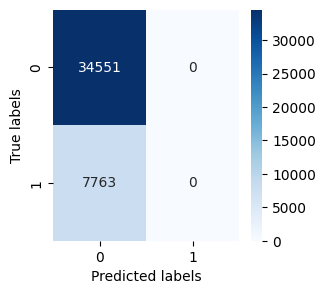

Rapport de classification pour AdaBoost:
              precision    recall  f1-score   support

     Class 0       0.82      1.00      0.90     34551
     Class 1       1.00      0.00      0.00      7763

    accuracy                           0.82     42314
   macro avg       0.91      0.50      0.45     42314
weighted avg       0.85      0.82      0.73     42314



In [20]:
# Application de l'échantillonnage aléatoire pour équilibrer les classes dans l'ensemble d'entraînement
# ros = RandomOverSampler() # ----------
# X_train_os, y_train_os = ros.fit_resample(X_train, y_train) # ----------
rus = RandomUnderSampler() # ----------
X_train_us, y_train_us = rus.fit_resample(X_train, y_train) # ----------

# Chargement du fichier CSV
# results_df = pd.read_csv('resultats_fabien/binary_random_search_over_results_max.csv') # ----------
results_df = pd.read_csv('resultats_fabien/binary_grid_search_under_results_max.csv') # ----------

best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Utilisation des best_params pour créer le meilleur estimateur
best_estimator = LogisticRegression(
    C=best_row['C'],
    max_iter=10000,
    multi_class=best_row['multi_class'],
    penalty=best_row['penalty'],
    solver=best_row['solver'],
    n_jobs=-1,
    l1_ratio=best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
)

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_estimator)

# Entraînement et évaluation du modèle AdaBoost
ada = AdaBoostClassifier(best_estimator, n_estimators=10, algorithm="SAMME.R", learning_rate=0.01)
# ada.fit(X_train_os, y_train_os) # ----------
# dump(ada, 'modeles_fabien/binary_Adaboost_over_dump.joblib') # ----------
ada.fit(X_train_us, y_train_us) # ----------
dump(ada, 'modeles_fabien/binary_Adaboost_under_dump.joblib') # ----------

y_test_pred_ada = ada.predict(X_test)

# Affichage de la matrice de confusion pour AdaBoost
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_test_pred_ada, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Rapport de classification pour AdaBoost
print("Rapport de classification pour AdaBoost:")
report = classification_report(y_test, y_test_pred_ada, labels=labels, target_names=["Class 0", "Class 1"], zero_division=1)
print(report)

# 17.4s over
# 9.5s under

## 8. Algorithme de bagging - undersampling

Les meilleurs hyperparamètres sont :
LogisticRegression(l1_ratio=0.5, max_iter=10000, multi_class='multinomial',
                   penalty='elasticnet', solver='saga')
Moyenne accuracy: 0.7703553828297212

Moyenne F1_class_1: 0.7763987970730754

Moyenne recall_class_1: 0.7973837647186394

Moyenne precision_class_1: 0.7564901022127845

Moyenne precision_macro: 0.7711477985102265

Moyenne recall_macro: 0.7703553798400001

Moyenne f1_macro: 0.7701874934758784

Moyenne roc_auc: 0.8490919767431814

Moyenne matthews_corrcoef: 0.5415025983931271

Moyenne Cust_metric: 0.7689452327564391



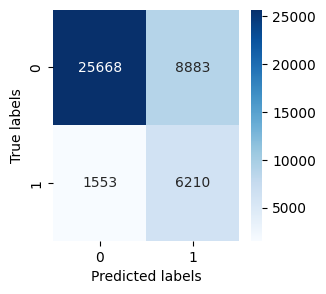

Rapport de classification pour le modèle avec Bagging:
              precision    recall  f1-score   support

    Classe 0    0.94295   0.74290   0.83106     34551
    Classe 1    0.41145   0.79995   0.54340      7763

    accuracy                        0.75337     42314
   macro avg    0.67720   0.77143   0.68723     42314
weighted avg    0.84544   0.75337   0.77828     42314



In [23]:
# Application de l'échantillonnage aléatoire pour équilibrer les classes dans l'ensemble d'entraînement
rus = RandomUnderSampler()
X_train_us, y_train_us = rus.fit_resample(X_train, y_train) 

# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/binary_grid_search_under_results_max.csv')

# Récupération de la ligne correspondant au meilleur index
best_index = results_df['F1_class_1'].idxmax()
best_row = results_df.iloc[best_index]

# Utilisation des hyperparamètres trouvés pour créer le meilleur estimateur de régression logistique
best_estimator = LogisticRegression(
    C=best_row['C'],
    max_iter=10000,
    multi_class=best_row['multi_class'],
    penalty=best_row['penalty'],
    solver=best_row['solver'],
    l1_ratio=best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
)

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_estimator)

# Définition des métriques personnalisées pour la classe 1

# Définition de my_metric pour les classes 0 et 1
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (1.5 * f1_score_class_0 + f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Utilisation du Bagging avec l'estimateur optimisé
bagging_clf = BaggingClassifier(estimator=best_estimator, n_estimators=2, random_state=42)
cv_results = cross_validate(bagging_clf, X_train_us, y_train_us, cv=3, scoring=scoring)

# Affichage des moyennes pour toutes les métriques
for metric in scoring.keys():
    mean_score = np.mean(cv_results['test_' + metric])
    print(f"Moyenne {metric}: {mean_score}\n")

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(cv_results)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/binary_bagging_under_results.csv')

# Entraînement du classificateur Bagging sur le jeu de données d'entraînement
bagging_clf.fit(X_train_us, y_train_us)

# Sauvegarde du modèle entraîné
dump(bagging_clf, 'modeles_fabien/binary_Bagging_under_best_model.joblib')

# prédiction des étiquettes du jeu de données de test
y_pred_bagging = bagging_clf.predict(X_test)

# Affichage de la matrice de confusion sous forme de heatmap
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred_bagging, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Génération et affichage du rapport de classification
print("Rapport de classification pour le modèle avec Bagging:")
report = classification_report(y_test, y_pred_bagging, labels=labels, target_names=["Classe 0", "Classe 1"], digits=5)
print(report)

# under : 11m 58.1s

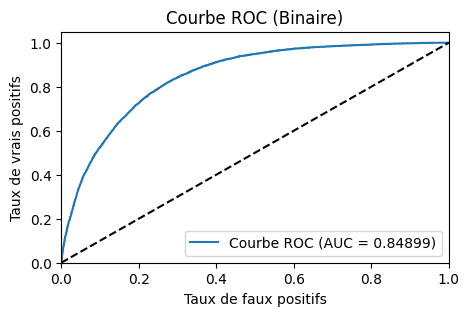

In [24]:
# Prédictions de probabilités pour la classe positive
y_score = bagging_clf.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

## 9. Algorithme de bagging - oversampling 

Les meilleurs hyperparamètres sont :
LogisticRegression(l1_ratio=0.5, max_iter=10000, multi_class='multinomial',
                   penalty='elasticnet', solver='saga')
Moyenne accuracy: 0.7710925494692439

Moyenne F1_class_1: 0.7765564205204026

Moyenne recall_class_1: 0.7955594184449252

Moyenne precision_class_1: 0.7584462795918641

Moyenne precision_macro: 0.7717487190436838

Moyenne recall_macro: 0.771092548364254

Moyenne f1_macro: 0.7709544802577044

Moyenne roc_auc: 0.8501441960056937

Moyenne matthews_corrcoef: 0.5428408594901173

Moyenne Cust_metric: 0.7698340922051647



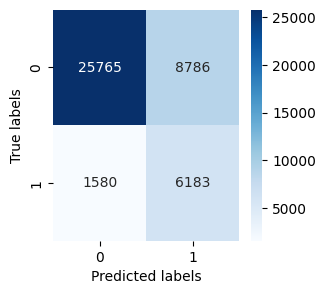

Rapport de classification pour le modèle avec Bagging:
              precision    recall  f1-score   support

    Classe 0    0.94222   0.74571   0.83253     34551
    Classe 1    0.41305   0.79647   0.54399      7763

    accuracy                        0.75502     42314
   macro avg    0.67764   0.77109   0.68826     42314
weighted avg    0.84514   0.75502   0.77959     42314



In [20]:
# Application de l'échantillonnage aléatoire pour équilibrer les classes dans l'ensemble d'entraînement
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/binary_grid_search_under_results_max.csv')

# Récupération de la ligne correspondant au meilleur index
best_index = results_df['F1_class_1'].idxmax()
best_row = results_df.iloc[best_index]

# Utilisation des hyperparamètres trouvés pour créer le meilleur estimateur de régression logistique
best_estimator = LogisticRegression(
    C=best_row['C'],
    max_iter=10000,
    multi_class=best_row['multi_class'],
    penalty=best_row['penalty'],
    solver=best_row['solver'],
    l1_ratio=best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
)

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_estimator)

# Définition des métriques personnalisées pour la classe 1
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (1.5 * f1_score_class_0 + f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Utilisation du Bagging avec l'estimateur optimisé
bagging_clf = BaggingClassifier(estimator=best_estimator, n_estimators=2, random_state=42)
cv_results = cross_validate(bagging_clf, X_train_os, y_train_os, cv=3, scoring=scoring)

# Affichage des moyennes pour toutes les métriques
for metric in scoring.keys():
    mean_score = np.mean(cv_results['test_' + metric])
    print(f"Moyenne {metric}: {mean_score}\n")

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(cv_results)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/binary_bagging_over_results.csv')

# Entraînement du classificateur Bagging sur le jeu de données d'entraînement
bagging_clf.fit(X_train_os, y_train_os)


# Sauvegarde du modèle entraîné
dump(bagging_clf, 'modeles_fabien/binary_Bagging_over_best_model.joblib')

# prédiction des étiquettes du jeu de données de test
y_pred_bagging = bagging_clf.predict(X_test)

# Affichage de la matrice de confusion sous forme de heatmap
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred_bagging, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Génération et affichage du rapport de classification
print("Rapport de classification pour le modèle avec Bagging:")
report = classification_report(y_test, y_pred_bagging, labels=labels, target_names=["Classe 0", "Classe 1"], digits=5)
print(report)

# over  : 26m 25.9s

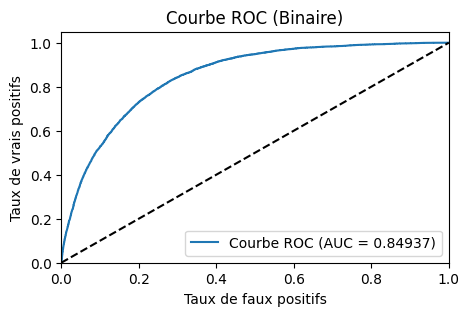

In [22]:
# Prédictions de probabilités pour la classe positive
y_score = bagging_clf.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

## 10. Shap

C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 1000
multi_class: ovr
n_jobs: None
penalty: l1
random_state: 42
solver: liblinear
tol: 0.0001
verbose: 0
warm_start: False
classe 1:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


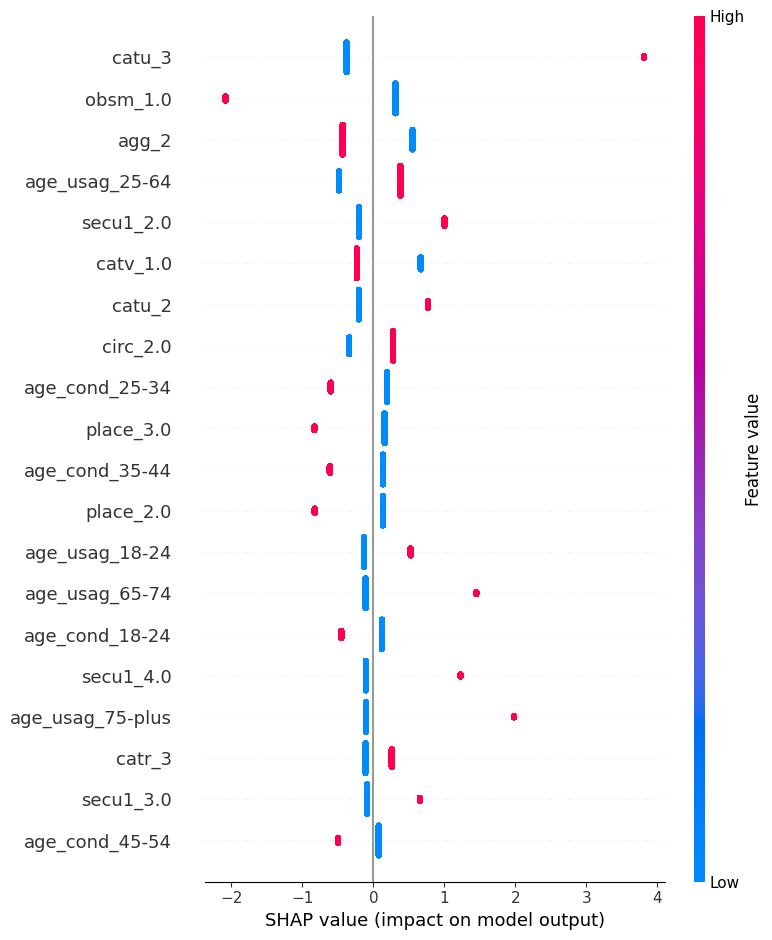

classe 0:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


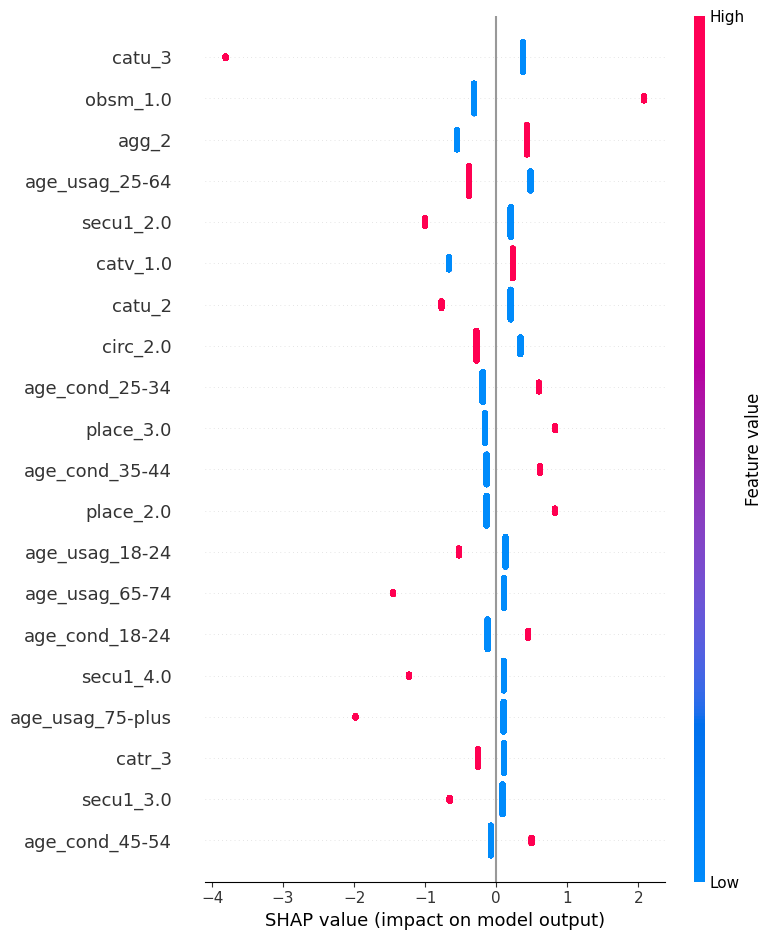

Shape of shap_values: (42314, 181)
Shape of X_test: (42314, 181)


In [18]:
# Récupération du meilleur modèle
best_model = load('modeles_fabien/binary_best_random_over_model.joblib')

# Affichage des hyperparamètres
params = best_model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

# Création d'un explainer SHAP
explainer = shap.Explainer(best_model, X_train)

# Calcul des valeurs SHAP
shap_values_obj = explainer(X_test)

# Affichage de l'importance des caractéristiques pour la classe 1
print("classe 1:")
shap.summary_plot(shap_values_obj.values, X_test)

# Affichage de l'importance des caractéristiques pour la classe 0
print("classe 0:")
shap.summary_plot(-shap_values_obj.values, X_test)

# Affichage des dimensions des valeurs SHAP et de l'ensemble de test
print("Shape of shap_values:", shap_values_obj.values.shape)
print("Shape of X_test:", X_test.shape)
